### Training Configurations:

- For PTI to run successfull, you need to adapt all the config files in `configs/` of the PTI Repo

In [ ]:
import os

In [2]:
os.chdir('../../PTI/')

In [3]:
from scripts.run_pti import run_PTI

In [4]:
run_PTI(run_name='test', use_wandb=False, use_multi_id_training=False)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /pfs/work7/workspace/scratch/tu_zxmav84-thesis/miniconda3/envs/thesis/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth


  0%|          | 0/2812 [00:00<?, ?it/s]

Setting up PyTorch plugin "bias_act_plugin"... Done.


Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


  0%|          | 1/2812 [01:38<76:38:26, 98.15s/it]


KeyboardInterrupt: 

In [5]:
import torch
G = torch.load("/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync/Models/PTI/experiments/checkpoints/model_test_02R21C00O-Q11.pt")

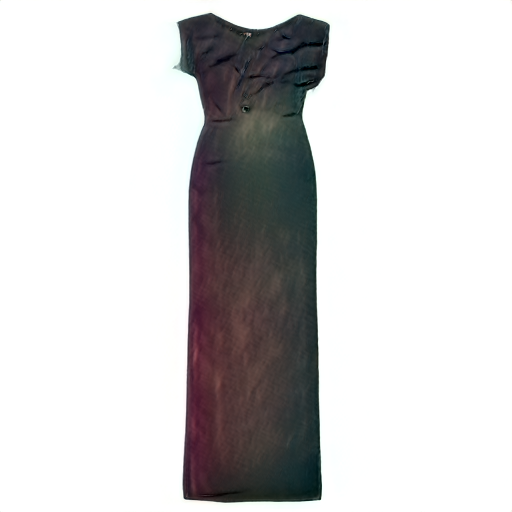

In [14]:
import PIL.Image
z = torch.randn([1, G.z_dim]).to('cuda')    # latent codes
c = None                                # class labels (not used in this example)
img = G(z, c,  force_fp32=True) 

img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB')

In [17]:
emb = torch.load("/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync/Models/PTI/experiments/embeddings/zalando_germany/PTI/02R21C00O-Q11/0.pt")
emb.shape

torch.Size([1, 16, 512])

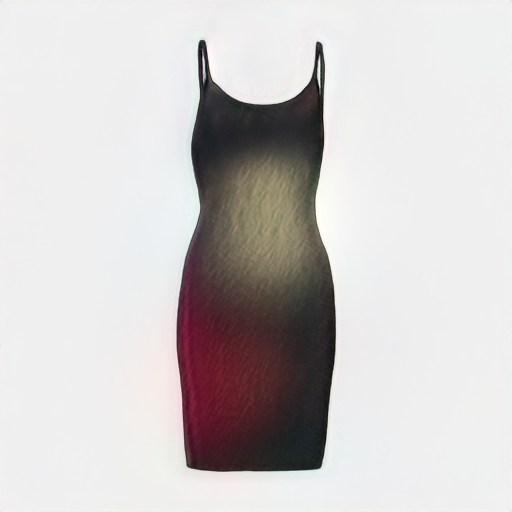

In [19]:
img = G.synthesis(emb)
img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB')